# SC1015 Mini Project: Video Game Sales Analysis

Made by: Bernard Chiang Zi Heng, Chee Wen Zhan, Tan Jia Ze

---

__Problem Statement__: 
1. Predict the sale volume of a game based on its attributes such as Developer, Publisher and Genre
2. Create a model to assist new / aspiring game developers in choosing desired attributes for their games

---

> The dataset __vgsales.csv__ is scraped on 27th March 2022 from VGChartz site https://www.vgchartz.com/gamedb/ <br>
> This website displays details of various games, such as name, developer and sales. <br>
> The Python program to scrape the website is created by github user _hechmik_. This program is a modified version of github user _GregorUT_'s program. <br> 
> The program can be found here: https://github.com/hechmik/vgchartzScrape 

---

## 1. Importing basic libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math

vgsales = pd.read_csv("vgsales.csv")
vgsales

,Rank,Name,Genre,Platform,Publisher,Developer,Vgchartz_Score,Critic_Score,User_Score,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Release_Date,Last_Update
0,1,Tetris,NaN,Series,Nintendo,Alexey Pajitnov,NaN,NaN,NaN,496400000.0,NaN,NaN,NaN,NaN,NaN,1989-07-31 00:00:00,2020-02-27 00:00:00
1,2,Pokemon,NaN,Series,Nintendo,Game Freak,NaN,NaN,NaN,402220000.0,NaN,NaN,NaN,NaN,NaN,1998-09-28 00:00:00,2020-02-03 00:00:00
2,3,Call of Duty,NaN,Series,Activision,Infinity Ward,NaN,NaN,NaN,400000000.0,NaN,NaN,NaN,NaN,NaN,2003-10-29 00:00:00,2020-02-03 00:00:00
3,4,Super Mario,NaN,Series,Nintendo,Nintendo,NaN,NaN,NaN,391450000.0,NaN,NaN,NaN,NaN,NaN,1983-07-20 00:00:00,2020-02-20 00:00:00
4,5,Grand Theft Auto,NaN,Series,Rockstar Games,Rockstar North,NaN,NaN,NaN,370000000.0,NaN,NaN,NaN,NaN,NaN,1998-03-27 00:00:00,2020-02-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61263,61264,Zombillie,NaN,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-29 00:00:00,2018-03-26 00:00:00
61264,61265,Zone of the Enders: The 2nd Runner MARS,NaN,PC,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-26 00:00:00
61265,61266,Zoo Tycoon: Ultimate Animal Collection,NaN,XOne,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-31 00:00:00,2018-09-26 00:00:00
61266,61267,Zoo Tycoon: Ultimate Animal Collection,NaN,PC,THQ Nordic,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-14 00:00:00,2018-11-19 00:00:00


## 2. Cleaning the dataset

The dataset scraped needs to be cleaned in the following ways: <br>
1. All regional sales columns are dropped, which are __NA_Sales__,	__PAL_Sales__	__JP_Sales__ and __Other_Sales__. We are only interested in __Total_Sales__ and __Total_Shipped__, which are the total sale volumes worldwide recorded by VGChartz.
2. Drop any entries that do not contain __Total_Shipped__ or __Total_Sales__ as these values are important in our analysis.
2. __Total_Shipped__ and __Total_Sales__ are merged into __Total_Sales__. They both represent sale volume and are mutually exclusive in the dataset.
3. We need the critic score for a game to perform our analysis, therefore all entries that do not contain __Critic_Score__ are dropped.
4. Some game entries contain more than one form of score, which are __Vgchartz_Score__, __Critic_Score__ and __User_Score__. Where possible, these values are taken as average and stored into the column __Score__.
5. All time entries, which are __Release_Date__ and __Last_Update__ are split into the columns __Year__, __Month__ and __Date__.
6. The column __Rank__ is dropped as it is irrelevant. Any other irrevelant columns created as a byproduct of the cleaning above are also removed.
---

The original dataset contains __61268__ game entries. <br>
After cleaning, __4889__ game entries remain.

---

In [2]:
# Dropping regional sales columns
vgsales = vgsales.drop(['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)

# Dropping rows that do not contain either Total_Shipped or Total_Sales
vgsales = vgsales[vgsales['Total_Sales'].notnull() | vgsales['Total_Shipped'].notnull()]

# Merging Total_Shipped and Total_Sales into Total_Sales
for i in range(len(vgsales.index)):
    if(pd.notnull(vgsales.at[i,'Total_Shipped'])):
        vgsales.at[i,'Total_Sales'] = vgsales.at[i,'Total_Shipped']
vgsales.drop(['Total_Shipped'], axis=1, inplace = True)

# Dropping rows that do not contain Critic_Score
vgsales.dropna(subset = ['Critic_Score'], axis = 0, inplace = True)

# Taking the average of Vgchartz_Score, Critic_Score and User_Score and store into Score
score = pd.Series(data = [], dtype = 'int64')
for index, row in vgsales.iterrows():
    count = 0
    total = 0
    if not pd.isna(row["Vgchartz_Score"]):
        count += 1
        total += row["Vgchartz_Score"]
    if not pd.isna(row["Critic_Score"]):
        count += 1
        total += row["Critic_Score"]
    if not pd.isna(row["User_Score"]):
        count += 1
        total += row["User_Score"]
    score[index] = total / count

vgsales = pd.concat([vgsales, score.rename('Score')], axis = 1)
vgsales.drop(['Vgchartz_Score', 'Critic_Score', 'User_Score'], axis = 1, inplace = True)

# Split all time entries into Year, Month and Date
vgsales["Release_Date"] = pd.to_datetime(vgsales["Release_Date"])
vgsales["Release_Year"] = vgsales["Release_Date"].apply(lambda date: date.year)
vgsales["Release_Month"] = vgsales["Release_Date"].apply(lambda date: date.month)

vgsales["Last_Update"].fillna(vgsales["Release_Date"])
vgsales["Last_Update"] = pd.to_datetime(vgsales["Last_Update"])
vgsales["Update_Year"] = vgsales["Last_Update"].apply(lambda date: date.year)
vgsales["Update_Month"] = vgsales["Last_Update"].apply(lambda date: date.month)

vgsales.drop(['Release_Date', 'Last_Update'], axis = 1, inplace = True)

# Convert these time variables into integer for EDA
vgsales = vgsales.astype({'Release_Year': 'Int32', 'Release_Month': 'Int32', 'Update_Year': 'Int32', 'Update_Month': 'Int32'})

# Drop Index and Rank columns
vgsales.drop(['Rank'], axis = 1, inplace = True)
vgsales.reset_index(inplace = True, drop = True)
vgsales

,Name,Genre,Platform,Publisher,Developer,Total_Sales,Score,Release_Year,Release_Month,Update_Year,Update_Month
0,Wii Sports,NaN,Wii,Nintendo,Nintendo EAD,82900000.0,7.700000,2006,11,<NA>,<NA>
1,Mario Kart 8 Deluxe,NaN,NS,Nintendo,Nintendo EPD,43350000.0,9.300000,2017,4,2018,11
2,Super Mario Bros.,NaN,NES,Nintendo,Nintendo EAD,40240000.0,9.100000,1985,10,<NA>,<NA>
3,Mario Kart Wii,NaN,Wii,Nintendo,Nintendo EAD,37380000.0,8.666667,2008,4,2018,4
4,Minecraft,NaN,PC,Mojang,Mojang AB,33150000.0,10.000000,2010,5,2018,8
...,...,...,...,...,...,...,...,...,...,...,...
4884,Sherlock Holmes: The Awakened,NaN,PC,Focus Home Interactive,Frogwares,0.0,6.000000,2007,3,<NA>,<NA>
4885,Top Spin 2,NaN,PC,2K Sports,Aspyr,0.0,6.800000,2007,6,<NA>,<NA>
4886,Disney Sports Motocross,NaN,GBA,Konami,Konami,0.0,5.200000,2003,3,<NA>,<NA>
4887,Elebits: The Adventures of Kai and Zero,NaN,DS,Konami,Konami,0.0,7.400000,2009,1,<NA>,<NA>


The model that we will use later will include __Developers__ and __Publishers__ as predictors.
These predictors will not be useful if their frequency of occurence across game entries are too few.
Therefore, we will remove __Developers__ and __Publishers__ game entries if they appear fewer than 10 times.

---

The original dataset contains __4889__ game entries. <br>
After cleaning, __2065__ game entries remain.

---


In [3]:
trigger = True
while trigger:
    trigger = False
    devs = []
    for idx,dev in enumerate(vgsales['Developer'].value_counts().index.tolist()):
        if vgsales['Developer'].value_counts()[idx] < 10:
            trigger = True
            devs.append(dev)

    pubs = []
    for idx,pub in enumerate(vgsales['Publisher'].value_counts().index.tolist()):
        if vgsales['Publisher'].value_counts()[idx] < 10:
            trigger = True
            pubs.append(pub)

    # Now removing the entries in vgsales dataset
    for index,row in vgsales.iterrows():
        if (row['Developer'] in devs):
            vgsales.drop(index,axis=0,inplace=True)
        elif (row['Publisher'] in pubs):
            vgsales.drop(index,axis=0,inplace=True)

# Resetting index
vgsales.reset_index(inplace = True, drop = True)
vgsales

,Name,Genre,Platform,Publisher,Developer,Total_Sales,Score,Release_Year,Release_Month,Update_Year,Update_Month
0,Wii Sports,NaN,Wii,Nintendo,Nintendo EAD,82900000.0,7.700000,2006,11,<NA>,<NA>
1,Mario Kart 8 Deluxe,NaN,NS,Nintendo,Nintendo EPD,43350000.0,9.300000,2017,4,2018,11
2,Super Mario Bros.,NaN,NES,Nintendo,Nintendo EAD,40240000.0,9.100000,1985,10,<NA>,<NA>
3,Mario Kart Wii,NaN,Wii,Nintendo,Nintendo EAD,37380000.0,8.666667,2008,4,2018,4
4,Wii Sports Resort,NaN,Wii,Nintendo,Nintendo EAD,33140000.0,8.533333,2009,7,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
2060,Red Faction,NaN,PC,THQ,Volition Inc.,0.0,8.100000,2001,9,<NA>,<NA>
2061,Disney Sports Snowboarding,NaN,GBA,Konami,Konami,0.0,5.100000,2003,2,<NA>,<NA>
2062,Sam & Max Hit the Road,NaN,PC,LucasArts,LucasArts,0.0,9.000000,1993,1,<NA>,<NA>
2063,Disney Sports Motocross,NaN,GBA,Konami,Konami,0.0,5.200000,2003,3,<NA>,<NA>


The option to scrape the __Genre__ for the scraping program is turned off as it will greatly increase scraping time. <br>
Therefore, we will make use of another dataset scraped by github user _GregorUT_ who also scraped from the same VGChartz site. <br> 
The dataset can be found here: https://www.kaggle.com/datasets/gregorut/videogamesales <br>
In this notebook, the dataset will have the filename __vgsales_kaggle.csv__. <br>
This dataset is scraped 5 years ago and is currently outdated. <br>
This dataset will only be used to fetch the genres for as many games as possible using name matching. <br>
Game entries that do not have a Genre at the end will be dropped.

---

The original dataset contains __2065__ game entries. <br>
After cleaning, __1856__ game entries remain.

---



In [4]:
# This is the dataset scraped by GregorUT
vgsales_kaggle = pd.read_csv("vgsales_kaggle.csv")
vgsales_kaggle

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
# Create a new Genre series for merging later
genre = pd.Series(data = [], dtype = 'str')
for i in range(len(vgsales.index)):
    genre[i] = None
    for j in range(len(vgsales_kaggle.index)):
        if(vgsales.at[i, 'Name'] == vgsales_kaggle.at[j, 'Name']):
            genre[i] = vgsales_kaggle.at[j, 'Genre']
            break

# Drop the initial Genre column which is empty due to the option of not scraping the Genre
# Then, concatenate the dataset with the new Genre series
vgsales.drop(['Genre'], axis = 1, inplace = True)
vgsales = pd.concat([vgsales, genre.rename('Genre')], axis = 1)
vgsales.dropna(subset = ['Genre'], axis = 0, inplace = True)
vgsales.reset_index(inplace = True, drop = True)
vgsales

,Name,Platform,Publisher,Developer,Total_Sales,Score,Release_Year,Release_Month,Update_Year,Update_Month,Genre
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82900000.0,7.700000,2006,11,<NA>,<NA>,Sports
1,Super Mario Bros.,NES,Nintendo,Nintendo EAD,40240000.0,9.100000,1985,10,<NA>,<NA>,Platform
2,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,37380000.0,8.666667,2008,4,2018,4,Racing
3,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,33140000.0,8.533333,2009,7,<NA>,<NA>,Sports
4,New Super Mario Bros.,DS,Nintendo,Nintendo EAD,30800000.0,8.600000,2006,5,<NA>,<NA>,Platform
...,...,...,...,...,...,...,...,...,...,...,...
1851,Rayman Arena,PC,Ubisoft,Ubisoft,0.0,5.100000,2002,9,<NA>,<NA>,Racing
1852,Madagascar,PC,Activision,Beenox,0.0,6.700000,2005,5,<NA>,<NA>,Platform
1853,Kirby's Adventure,VC,Nintendo,HAL Laboratory,0.0,8.400000,2007,2,<NA>,<NA>,Platform
1854,Red Faction,PC,THQ,Volition Inc.,0.0,8.100000,2001,9,<NA>,<NA>,Shooter


# 3. Performing Exploratory Data Analysis (EDA) on Dataset

In [6]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           1856 non-null   object 
 1   Platform       1856 non-null   object 
 2   Publisher      1856 non-null   object 
 3   Developer      1856 non-null   object 
 4   Total_Sales    1856 non-null   float64
 5   Score          1856 non-null   float64
 6   Release_Year   1856 non-null   Int32  
 7   Release_Month  1856 non-null   Int32  
 8   Update_Year    236 non-null    Int32  
 9   Update_Month   236 non-null    Int32  
 10  Genre          1856 non-null   object 
dtypes: Int32(4), float64(2), object(5)
memory usage: 137.9+ KB


Based on the above, we have:-
- 2 numerical variables `['Total_Sales', 'Score']`
- 5 categorical variables `['Name', 'Platform', 'Publisher', 'Developer', 'Genre']`
- 4 time variables `['Release_Year', 'Release_Month', 'Update_Year', 'Update_Month']`

---

We will perform the following EDA to observe any possible trends and patterns:- <br>
a) Boxplots, histograms and violin plots on numeric and time variables <br>
b) Correlation analysis on numeric and time variables <br>
c) Pairplot on numeric and time variables <br>
d) Total Sales against each time variable <br>
e) Number of Game Entries in each Genre <br>
f) Total Sales against Top 10 Developers and Top 10 Publishers <br>
g) Number of Game Entries for each time variable <br>

---

### We will start with EDA on __numeric and time variables__

In [7]:
vgsales.describe()

,Total_Sales,Score,Release_Year,Release_Month,Update_Year,Update_Month
count,1.856000e+03,1856.000000,1856.000000,1856.000000,236.000000,236.000000
mean,1.531837e+06,7.547522,2006.847522,7.635237,2018.139831,3.932203
std,3.523789e+06,1.213545,4.416207,3.257507,0.489835,3.057544
min,0.000000e+00,2.500000,1985.000000,1.000000,2017.000000,1.000000
25%,2.300000e+05,6.800000,2004.000000,5.000000,2018.000000,1.000000
50%,6.000000e+05,7.775000,2007.000000,9.000000,2018.000000,3.000000
75%,1.500000e+06,8.500000,2010.000000,10.000000,2018.000000,4.000000
max,8.290000e+07,10.000000,2018.000000,12.000000,2020.000000,12.000000


### a) Boxplots, histograms and violin plots of numeric and time variables

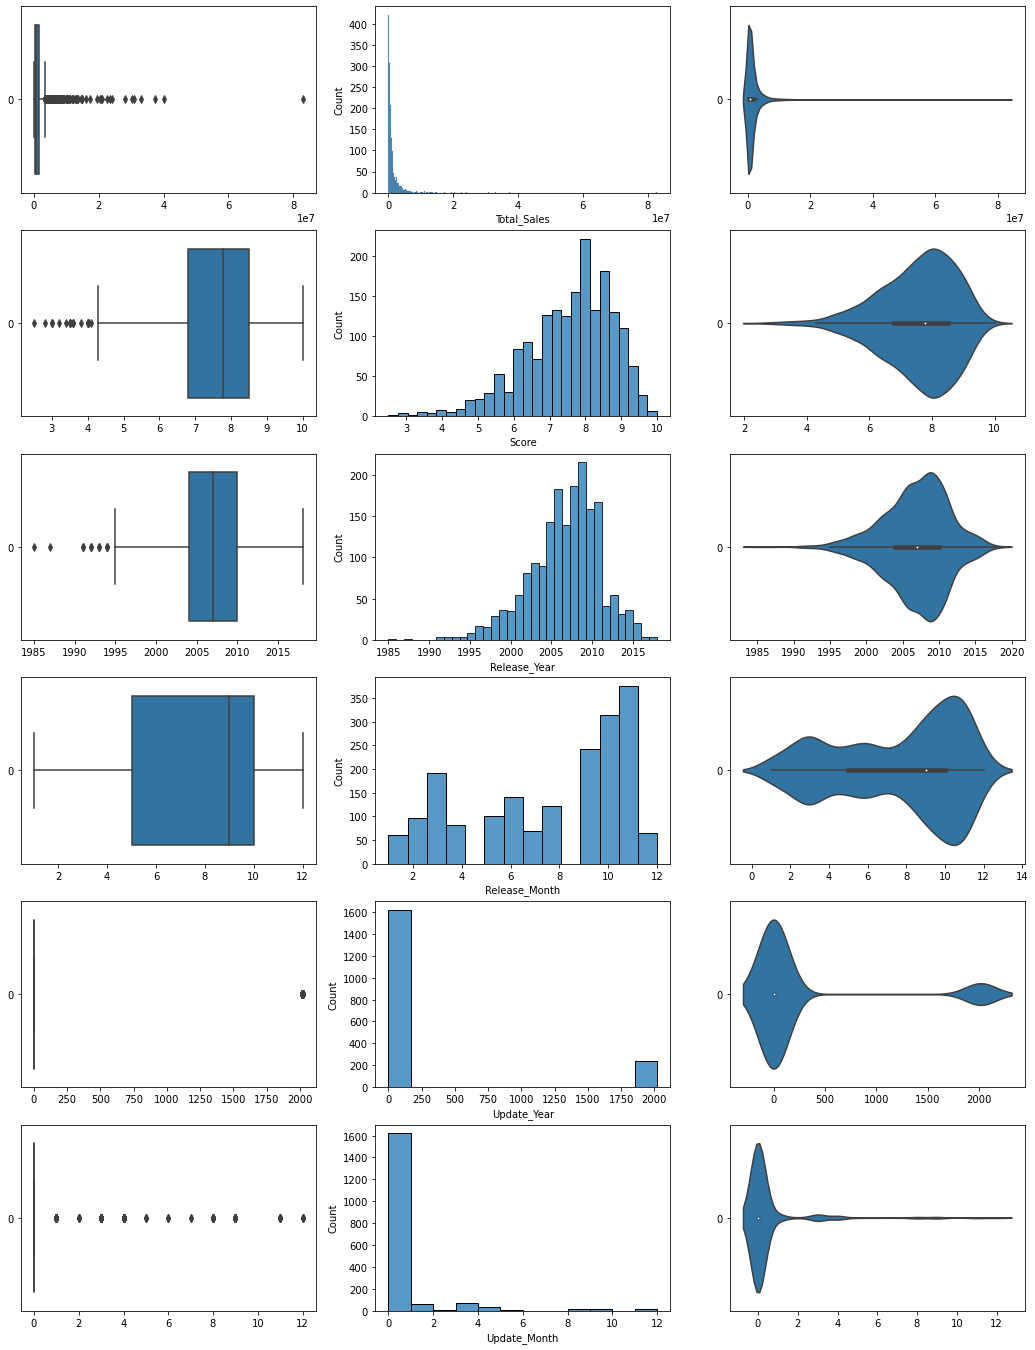

In [8]:
numericval = pd.DataFrame(vgsales[['Total_Sales', 'Score', 'Release_Year', 'Release_Month', 'Update_Year', 'Update_Month']])
numericval.fillna(0, inplace = True)

f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numericval:
    sb.boxplot(data = numericval[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numericval[var], ax = axes[count,1])
    sb.violinplot(data = numericval[var], orient = "h", ax = axes[count,2])
    count += 1

### Analysis: 

1. Few games have __Total_Sales__ exceeding 1 million. Considering the large amount of games in the market, it is incredibly hard to stand out in the gaming industry.
2. There are many null entries for __Update_Year__ and __Update_Month__, making them unreliable as predictors for our model to predict sale volume. This observation can be explained by the fact that not many games in the industry are updated once they are released.

### b) Correlation analysis for the numeric and time variables

<AxesSubplot:>

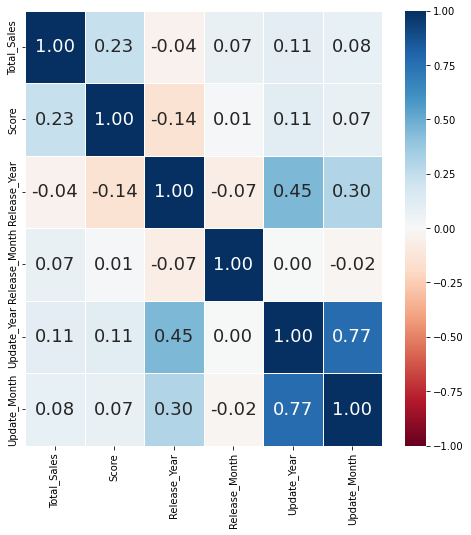

In [9]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(numericval.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Analysis:

1. There seem to be a high correlation between __Update_Year__ and __Update_Month__. However, considering that these columns consist of a lot of null values, this correlation does not mean anything significant.
2. Other than that, there does not seem to be a strong correlation between any numeric variables and any time variables.
3. __Total_Sales__ is the response variable, and when its correlation is observed against against other predictor variables, it seems to have very low correlation, with the highest being only 0.23 with __Score__. This suggests that a simple linear regresion may not be that appropriate in predicting __Total_Sales__. 

### c) Pair plot of numeric and time variables

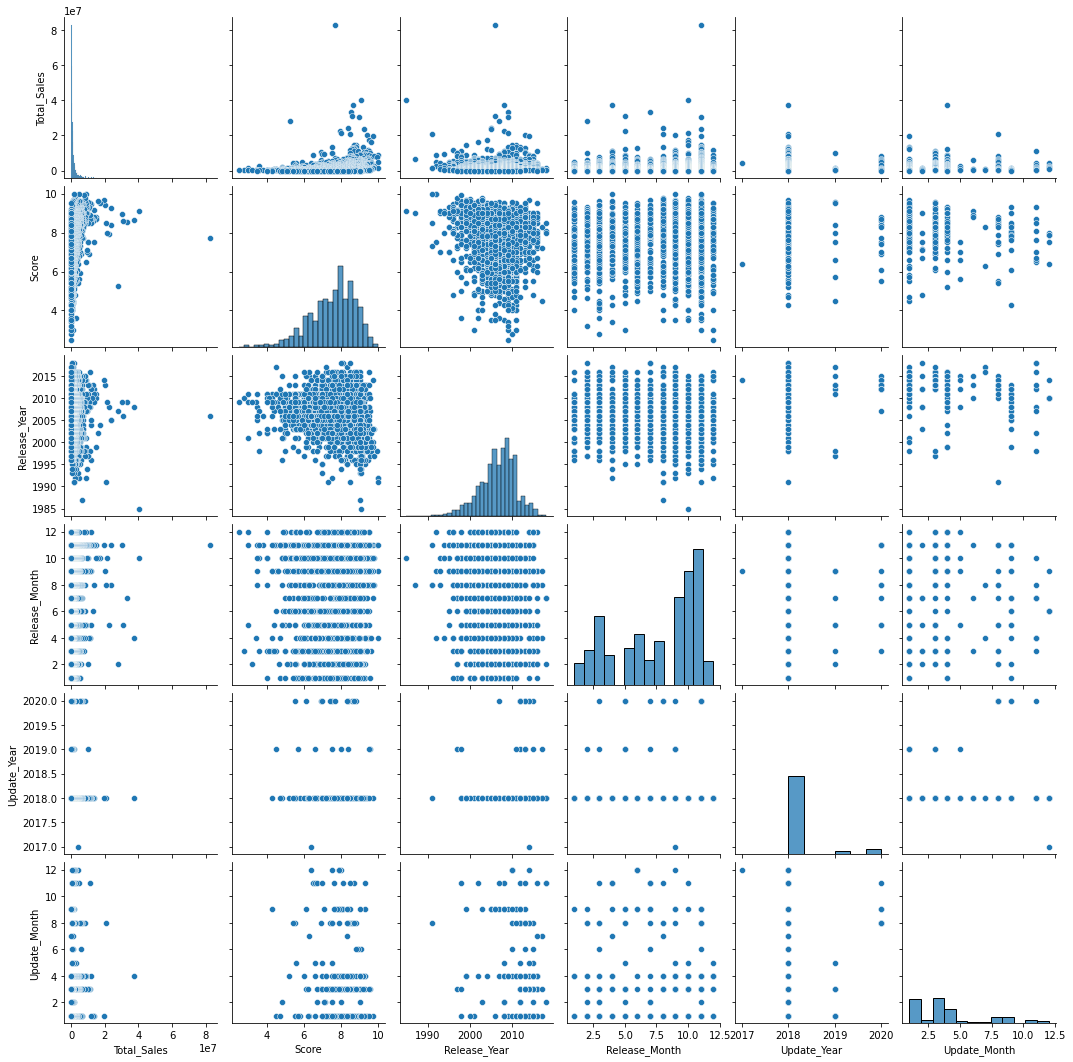

In [10]:
sb.pairplot(data = vgsales)

### d) Total Sales against each time variable

<AxesSubplot:xlabel='Release_Year', ylabel='Total_Sales'>

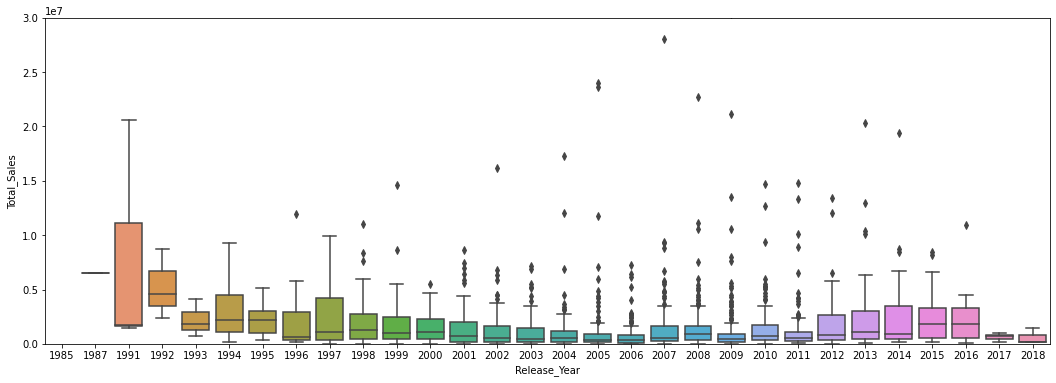

In [11]:
f = plt.figure(figsize=(18, 6))
plt.ylim(0, 3 * 1e7)
data = pd.DataFrame(vgsales[['Total_Sales', 'Release_Year']])
sb.boxplot(x = 'Release_Year', y = data['Total_Sales'], data = data)

<AxesSubplot:xlabel='Release_Month', ylabel='Total_Sales'>

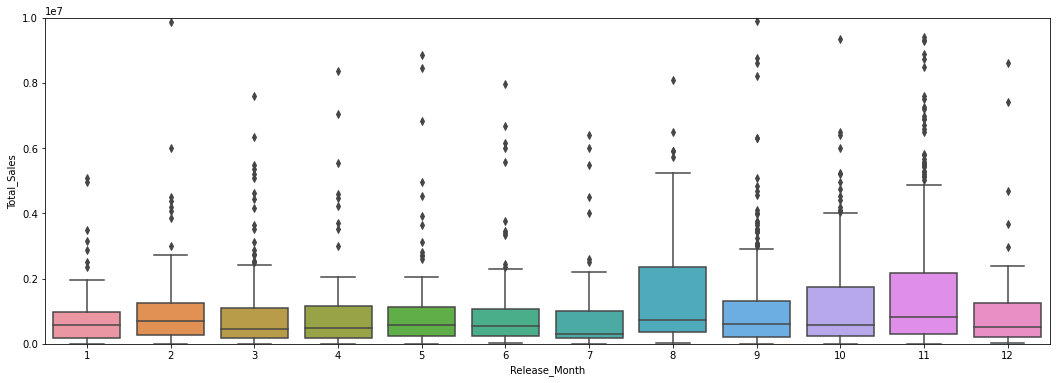

In [12]:
f = plt.figure(figsize=(18, 6))
plt.ylim(0, 1 * 1e7)
data = pd.DataFrame(vgsales[['Total_Sales', 'Release_Month']])
sb.boxplot(x = 'Release_Month', y = data['Total_Sales'], data = data)

<AxesSubplot:xlabel='Update_Year', ylabel='Total_Sales'>

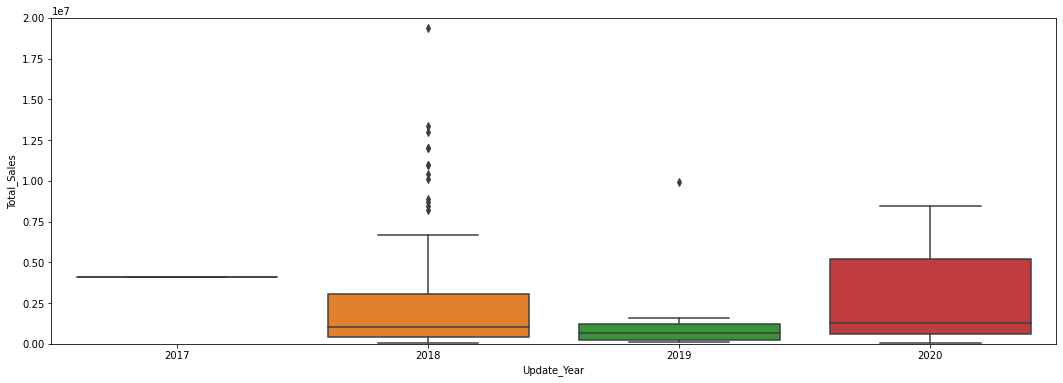

In [13]:
f = plt.figure(figsize=(18, 6))
plt.ylim(0, 2 * 1e7)
data = pd.DataFrame(vgsales[['Total_Sales', 'Update_Year']])
data = data.dropna(subset = ['Update_Year'], axis = 0)
sb.boxplot(x = 'Update_Year', y = data['Total_Sales'], data = data)

<AxesSubplot:xlabel='Update_Month', ylabel='Total_Sales'>

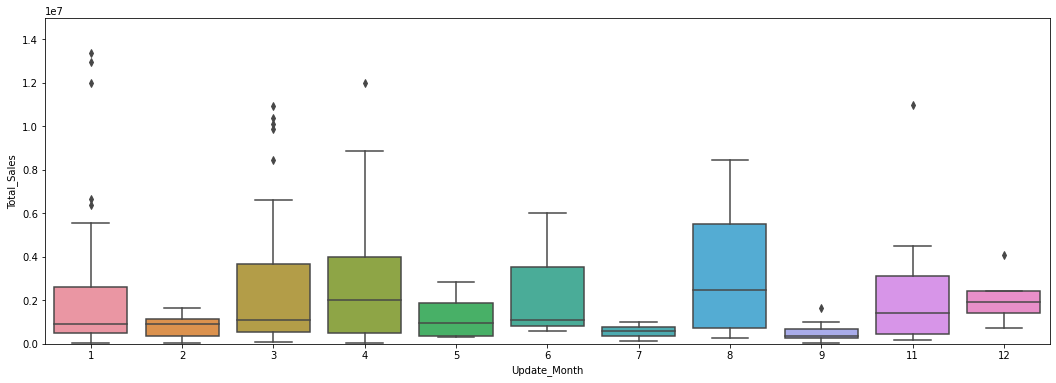

In [14]:
f = plt.figure(figsize=(18, 6))
plt.ylim(0, 1.5 * 1e7)
data = pd.DataFrame(vgsales[['Total_Sales', 'Update_Month']])
data = data.dropna(subset = ['Update_Month'], axis = 0)
sb.boxplot(x = 'Update_Month', y = data['Total_Sales'], data = data)

### Analysis:

1. There seems to be a dip in Total Sales for the __Release_Year__ 2005 to 2009. This coincides with the global financial crisis in 2008 and 2009, which caused a recession in the global economy. This could explain why the sales of these games are not as good as other years.
2. Games released in August reported the best sale volume compared to other months. August coincides with the summer period, therefore it is possible that many students picked up games to play during summer vacation.
3. Games released near the end of the year, from October to December, also reported better sale volume than other months except August. This coincides with the Christmas season, where many game stores such as Steam will push out discounts for existing big titles.

### Data-driven Insight:
1. New game developers should be __wary of periods of recession__ when releasing their game, as the game industry seems to move alongside the global economy. For example, they should wait for the Covid-19 pandemic to settle down before publishing their game.
2. New game developers in the industry should target __the summer period__ around August to __release their game__ in the market as this is one of the most profitable periods throughout the year.

### e) Number of game entries in each Genre

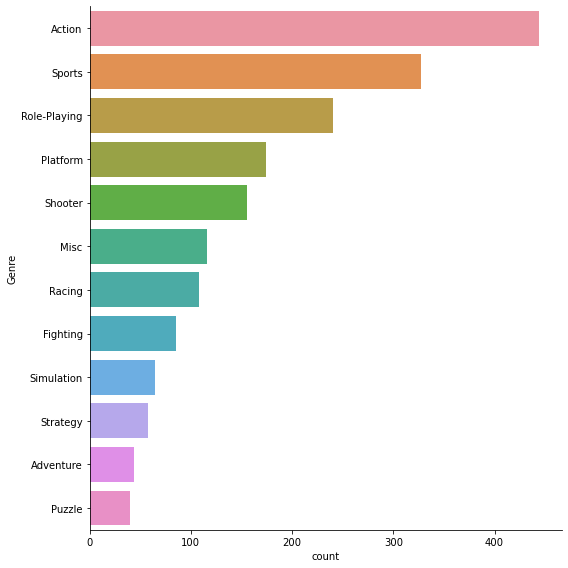

In [15]:
sb.catplot(y = 'Genre', data = vgsales, kind = "count", height = 8, order = vgsales['Genre'].value_counts().index)

### Analysis:

1. Most games belong in the __Action__ genre, followed by __Sports__ and __Role-Playing__. __Action__ games provide gamers with the thrill of playing the game, hence tend to be more successful in keeping gamers engaged. __Sports__ games are one of the most realistic games because these games revolve around existing sports in the real world. Whereas __Role-Playing__ games are excellent for their immersive story-telling.

### Data-driven Insight:

1. A safe option for new game developers while choosing a game genre to base their game on is __Action__ or __Role-Playing__. This is due to the existing popularity of these genres. These genres in particular also have lots of room for innovative gameplay, as seen in unique game titles such as Sekiro (parry-focused Action game) and Undertale (decision-heavy Role-Playing game).

### f) Total Sales against Top 10 Publishers and Top 10 Developers

Displaying the performance of the Top 10 __Publishers__ by number of games produced. <br>
First, we need to identify which publishers are among the top 10.

In [16]:
data = pd.DataFrame(vgsales[['Publisher', 'Total_Sales']])
data['Publisher'].value_counts()

Nintendo                        214
Ubisoft                         175
Activision                      174
Electronic Arts                 158
EA Sports                       157
Sega                            120
Konami                          109
Capcom                           87
THQ                              62
Square Enix                      60
LucasArts                        44
Sony Computer Entertainment      43
2K Sports                        41
Namco Bandai                     39
Eidos Interactive                38
Namco                            37
Atlus                            34
Codemasters                      27
NIS America                      23
Midway Games                     20
MTV Games                        18
Disney Interactive Studios       17
Bethesda Softworks               17
Warner Bros. Interactive         17
Blizzard Entertainment           16
Rockstar Games                   15
Tecmo Koei                       14
Microsoft Game Studios      

Then, we drop the games which Publishers are not among the Top 10 list.

In [17]:
publist = []
for idx,pub in enumerate(vgsales['Publisher'].value_counts().index.tolist()):
    if idx > 9:
        break
    publist.append(pub)

for x in range(len(data.index)):
    if (data.at[x, 'Publisher'] not in publist):
        data = data.drop([x, x])

Finally, we display the relative performance of these publishers by plotting them against Total Sales

<AxesSubplot:xlabel='Publisher', ylabel='Total_Sales'>

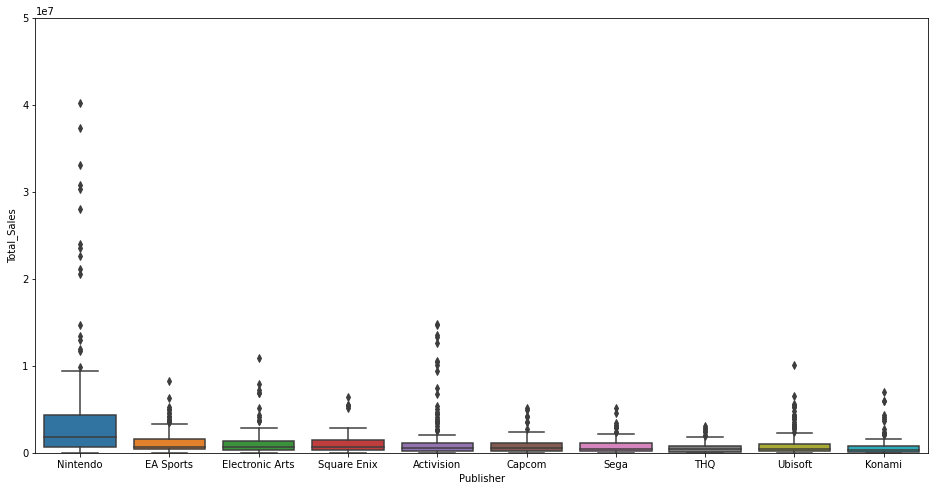

In [18]:
f = plt.figure(figsize=(16, 8))
tick = 1 * 1e7
maxrange = 5 * 1e7
plt.ylim(0, 5 * 1e7)
sb.boxplot(x = 'Publisher', y = 'Total_Sales', data = data, 
           order = data.groupby('Publisher')['Total_Sales'].median().sort_values(ascending = False).index)

### Analysis:

1. __Nintendo__ is one of the most successful publisher, both in terms of number of games produced and the sale volume of their games. Nintendo is one of the earliest companies to establish themselves in the gaming industry in 1980. They own many gaming trademarks such as Super Mario, Legend of Zelda and Kirby. Besides that, they also own a popular platform for gaming, which is the Nintendo Switch. This explains how they are continuously able to release popular games and retain loyalty from customers. Taken from www.nintendo.com

Displaying the performance of the Top 10 __Developers__ by number of games produced. <br>
First, we need to identify which developers are among the top 10.

In [19]:
data = pd.DataFrame(vgsales[['Developer', 'Total_Sales']])
data['Developer'].value_counts()

Capcom               89
Ubisoft Montreal     82
EA Tiburon           82
EA Canada            82
Konami               69
                     ..
Nd Cube Co., Ltd.     7
Atlus                 7
EA Vancouver          6
Game Freak            5
Nintendo EPD          3
Name: Developer, Length: 89, dtype: int64

Then, we drop the games which Publishers are not among the Top 10 list.

In [20]:
devlist = []
for idx,dev in enumerate(vgsales['Developer'].value_counts().index.tolist()):
    if idx > 9:
        break
    devlist.append(dev)

for x in range(len(data.index)):
    if (data.at[x, 'Developer'] not in devlist):
        data = data.drop([x, x])

Finally, we display the relative performance of these developers by plotting them against Total Sales

<AxesSubplot:xlabel='Developer', ylabel='Total_Sales'>

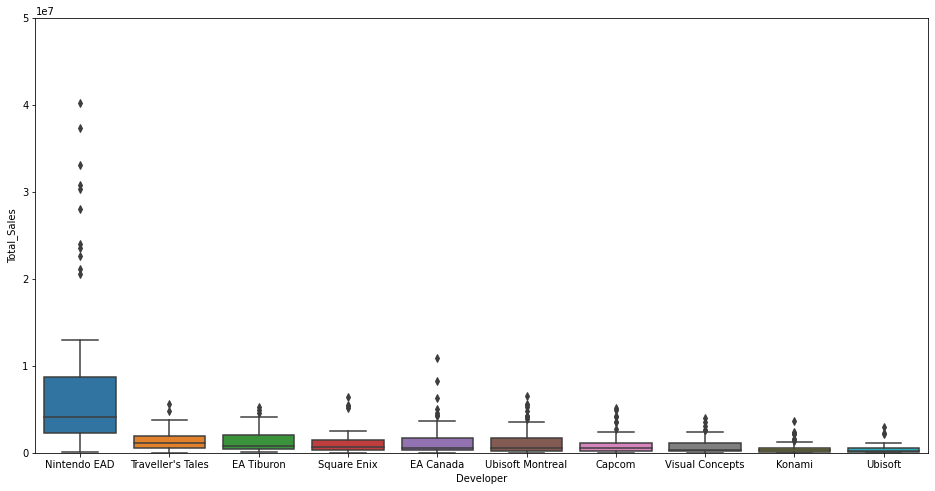

In [21]:
f = plt.figure(figsize=(16, 8))
plt.ylim(0, 5 * 1e7)
sb.boxplot(x = 'Developer', y = 'Total_Sales', data = data, 
           order = data.groupby('Developer')['Total_Sales'].median().sort_values(ascending = False).index)

### Analysis:

1. __Nintendo EAD__ (Nintendo Entertainment Analysis & Development) is the most successful developer in the gaming industry in terms of both number of games and their sale volume. Nintendo EAD, true to its name, is able to continuously develop newfound gaming experiences to players while maintaining the quality of their games, therefore staying ahead of their competition.

### Data-driven Insight:

1. If a new game developer is seeking a partnership with an existing game company to publish their game, __Nintendo__ is the safest option for them to make a profit, both as a developer and a publisher.

Displaying the number of games released in that specific __Release_Year__, __Release_Month__, __Update_Year__ and __Update_Month__

Number of games released against Release_Year


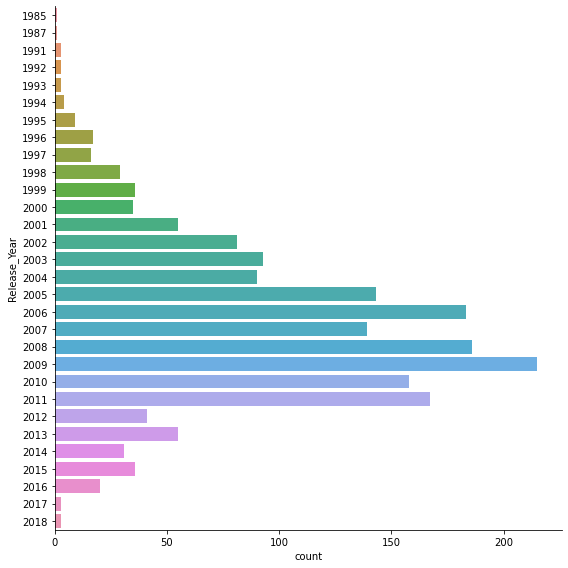

In [22]:
print("Number of games released against Release_Year")
sb.catplot(y = 'Release_Year', data = vgsales, kind = "count", height = 8)

Number of games released against Release_Month


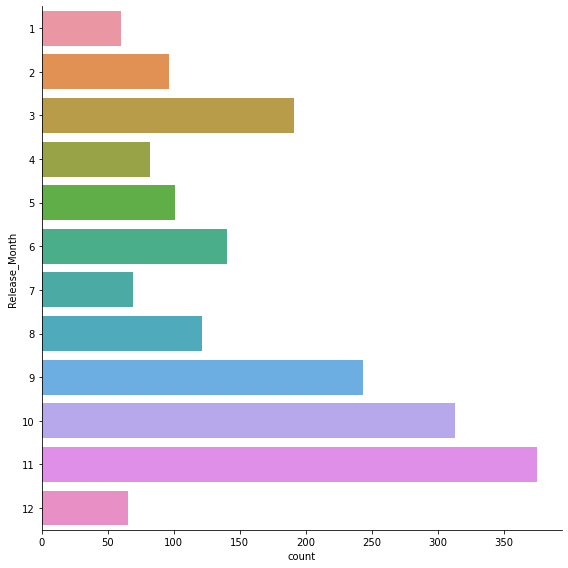

In [23]:
print("Number of games released against Release_Month")
sb.catplot(y = 'Release_Month', data = vgsales, kind = "count", height = 8)

### Analysis:

1. The most number of games released in a month is __November__. This coincides with the Christmas season where many games will be offered on discount. 
2. On the other hand, relatively fewer games are released in __December__, __January__ and __July__. Since most of the games are already released in November, the games released in December and January therefore are understandably fewer. The observation in July can also be explained in a similar manner, where many game developers are preparing their games for the Christmas period, the most profitable period.

### Data-driven Insight:

1. Alongside the graph of __Release_Month__ against __Total_Sales__ shown earlier, we can deduce that throughout the year, the __Christmas season__ is one of the most popular and most profitable period in the gaming industry.
2. This catplot above reinforces the fact that newer game developers should __release their game__ in the __early summer period__ of July / August as competition for their games are relatively few.

Number of games released against Update_Year


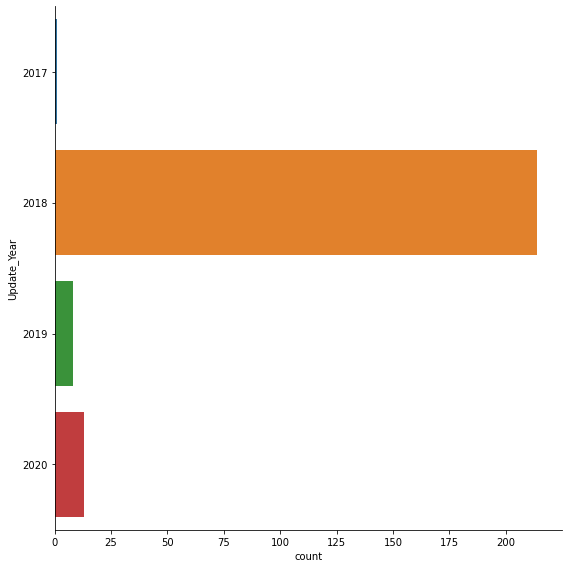

In [24]:
# Dropping NA values in Update_Year
data = pd.DataFrame(vgsales[['Total_Sales', 'Update_Year']])
data = data.dropna(subset = ['Update_Year'], axis = 0)

print("Number of games released against Update_Year")
sb.catplot(y = 'Update_Year', data = data, kind = "count", height = 8)

Number of games released against Update_Month


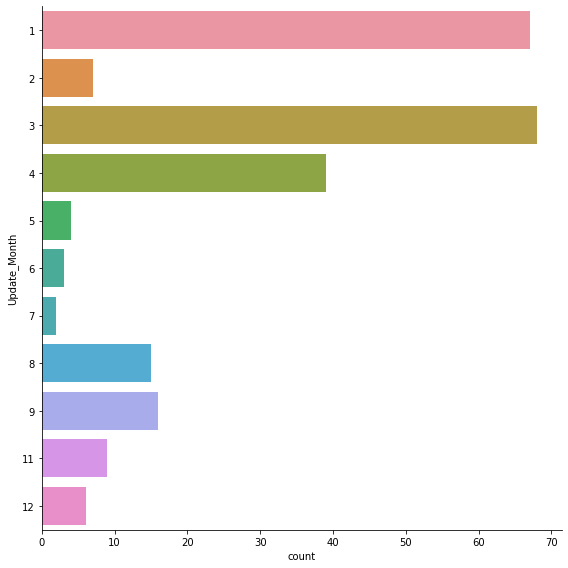

In [25]:
# Dropping NA values in Update_Month
data = pd.DataFrame(vgsales[['Total_Sales', 'Update_Month']])
data = data.dropna(subset = ['Update_Month'], axis = 0)

print("Number of games released against Update_Month")
sb.catplot(y = 'Update_Month', data = data, kind = "count", height = 8)

# 4. Data-preprocessing for Use in Model

### Removing Outliers

Prior to implementing the model, we need to remove the outliers. <br>
Game entries where __Total_Sales__ value is an outlier will be removed.

In [26]:
# Calculate the quartiles
Q1 = vgsales['Total_Sales'].quantile(0.25)
Q3 = vgsales['Total_Sales'].quantile(0.75)

# Rule to identify outliers
rule = ((vgsales['Total_Sales'] < (Q1 - 1.5 * (Q3 - Q1))) | (vgsales['Total_Sales'] > (Q3 + 1.5 * (Q3 - Q1))))

# Remove the outliers based on the row indices obtained above
outlierindices = rule.index[rule == True]
vgsales.drop(axis = 0, index = outlierindices, inplace = True)

# Check the clean data
vgsales.reset_index(inplace = True, drop = True)
vgsales

,Name,Platform,Publisher,Developer,Total_Sales,Score,Release_Year,Release_Month,Update_Year,Update_Month,Genre
0,Crash Bash,PS,Sony Computer Entertainment,Eurocom Entertainment Software,3390000.0,6.8,2000,11,<NA>,<NA>,Misc
1,The Legend of Zelda: Majora's Mask,N64,Nintendo,Nintendo EAD,3360000.0,9.3,2000,10,<NA>,<NA>,Action
2,Assassin's Creed IV: Black Flag,X360,Ubisoft,Ubisoft Montreal,3340000.0,8.5,2013,10,2018,3,Action
3,Big Brain Academy: Wii Degree,Wii,Nintendo,Nintendo EAD,3340000.0,7.1,2007,6,<NA>,<NA>,Misc
4,Luigi's Mansion,GC,Nintendo,Nintendo EAD,3330000.0,7.9,2001,11,<NA>,<NA>,Action
...,...,...,...,...,...,...,...,...,...,...,...
1656,Rayman Arena,PC,Ubisoft,Ubisoft,0.0,5.1,2002,9,<NA>,<NA>,Racing
1657,Madagascar,PC,Activision,Beenox,0.0,6.7,2005,5,<NA>,<NA>,Platform
1658,Kirby's Adventure,VC,Nintendo,HAL Laboratory,0.0,8.4,2007,2,<NA>,<NA>,Platform
1659,Red Faction,PC,THQ,Volition Inc.,0.0,8.1,2001,9,<NA>,<NA>,Shooter


### Changing Total_Sales into smaller values

Right now, the __Total_Sales__ values are all very large, some of them exceeding a million. <br>
It is easier for a model to learn and understand smaller values than larger values. <br>
Therefore, we will convert __Total_Sales__ values into _millions_ and change the variable name accordingly.

In [27]:
vgsales['Total_Sales'] = vgsales['Total_Sales'].apply(lambda x : x/1000000)
vgsales.rename(columns = {'Total_Sales': 'Total_Sales (in mil)'}, inplace = True)
vgsales

,Name,Platform,Publisher,Developer,Total_Sales (in mil),Score,Release_Year,Release_Month,Update_Year,Update_Month,Genre
0,Crash Bash,PS,Sony Computer Entertainment,Eurocom Entertainment Software,3.39,6.8,2000,11,<NA>,<NA>,Misc
1,The Legend of Zelda: Majora's Mask,N64,Nintendo,Nintendo EAD,3.36,9.3,2000,10,<NA>,<NA>,Action
2,Assassin's Creed IV: Black Flag,X360,Ubisoft,Ubisoft Montreal,3.34,8.5,2013,10,2018,3,Action
3,Big Brain Academy: Wii Degree,Wii,Nintendo,Nintendo EAD,3.34,7.1,2007,6,<NA>,<NA>,Misc
4,Luigi's Mansion,GC,Nintendo,Nintendo EAD,3.33,7.9,2001,11,<NA>,<NA>,Action
...,...,...,...,...,...,...,...,...,...,...,...
1656,Rayman Arena,PC,Ubisoft,Ubisoft,0.00,5.1,2002,9,<NA>,<NA>,Racing
1657,Madagascar,PC,Activision,Beenox,0.00,6.7,2005,5,<NA>,<NA>,Platform
1658,Kirby's Adventure,VC,Nintendo,HAL Laboratory,0.00,8.4,2007,2,<NA>,<NA>,Platform
1659,Red Faction,PC,THQ,Volition Inc.,0.00,8.1,2001,9,<NA>,<NA>,Shooter


### Changing Categorical Predictors into corresponding Numerical Categories

We also need to change categorical predictors to numerical categories. <br>
This is because the linear regression model cannot accept categorical inputs. <br>
The cateogrical predictors that will be converted are Platform, Genre, Publisher and Developer.

In [28]:
plats = {}
gen = {}
pubs = {}
devs = {}
count = 1
for idx,name in enumerate(vgsales['Platform'].value_counts().index.tolist()):
    plats[name] = count
    count = count+1
count = 1
for idx,name in enumerate(vgsales['Genre'].value_counts().index.tolist()):
    gen[name] = count
    count = count+1
count = 1
for idx,name in enumerate(vgsales['Developer'].value_counts().index.tolist()):
    devs[name] = count
    count = count+1
count = 1
for idx,name in enumerate(vgsales['Publisher'].value_counts().index.tolist()):
    pubs[name] = count
    count = count+1

In [29]:
for idx,row in vgsales.iterrows():
    vgsales.loc[idx,['Genre']] = gen[row['Genre']]
    vgsales.loc[idx,['Developer']] = devs[row['Developer']]
    vgsales.loc[idx,['Publisher']] = pubs[row['Publisher']]
    vgsales.loc[idx,['Platform']] = plats[row['Platform']]

vgsales

,Name,Platform,Publisher,Developer,Total_Sales (in mil),Score,Release_Year,Release_Month,Update_Year,Update_Month,Genre
0,Crash Bash,10,12,42,3.39,6.8,2000,11,<NA>,<NA>,6
1,The Legend of Zelda: Majora's Mask,15,3,15,3.36,9.3,2000,10,<NA>,<NA>,1
2,Assassin's Creed IV: Black Flag,1,1,3,3.34,8.5,2013,10,2018,3,1
3,Big Brain Academy: Wii Degree,5,3,15,3.34,7.1,2007,6,<NA>,<NA>,6
4,Luigi's Mansion,6,3,15,3.33,7.9,2001,11,<NA>,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...
1656,Rayman Arena,7,1,8,0.00,5.1,2002,9,<NA>,<NA>,7
1657,Madagascar,7,2,71,0.00,6.7,2005,5,<NA>,<NA>,4
1658,Kirby's Adventure,23,3,46,0.00,8.4,2007,2,<NA>,<NA>,4
1659,Red Faction,7,9,32,0.00,8.1,2001,9,<NA>,<NA>,5


# 5. Creating the Model to predict Total_Sales

The predictors that will be used are __Genre__, __Platform__, __Publisher__, __Developer__, __Score__, __Release Month__. <br>
These are the variables that we chose not to use, and the reasons behind them:-
1. __Name__ : Name is not indicative of the quality of a game, therefore Name should not affect Total_Sales.
2. __Release_Year__ : This model is used to predict the sales of upcoming games instead of existing games, whereas this dataset only contains existing games. Therefore, the year of release is irrelevant to this model.
3. __Update_Month__ and __Update_Year__ : These variables contain too many null values.

---

The model used is __Linear Regression__. 

In [30]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(vgsales[['Genre', 'Platform', 'Publisher', 'Developer','Score', 'Release_Month']])
y = pd.DataFrame(vgsales['Total_Sales (in mil)'])

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genre          1661 non-null   object 
 1   Platform       1661 non-null   object 
 2   Publisher      1661 non-null   object 
 3   Developer      1661 non-null   object 
 4   Score          1661 non-null   float64
 5   Release_Month  1661 non-null   Int32  
dtypes: Int32(1), float64(1), object(4)
memory usage: 73.1+ KB


### Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

### Creating the model and evaluating its performance

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train,y_train)

#Evaluation of model
pred = linreg.predict(X_test)
print("MSE: ",mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

MSE:  0.5812709536900948
RMSE:  0.7624112759463194


#### As we can see from the RMSE score of the simple linear regression above, it is quite high.

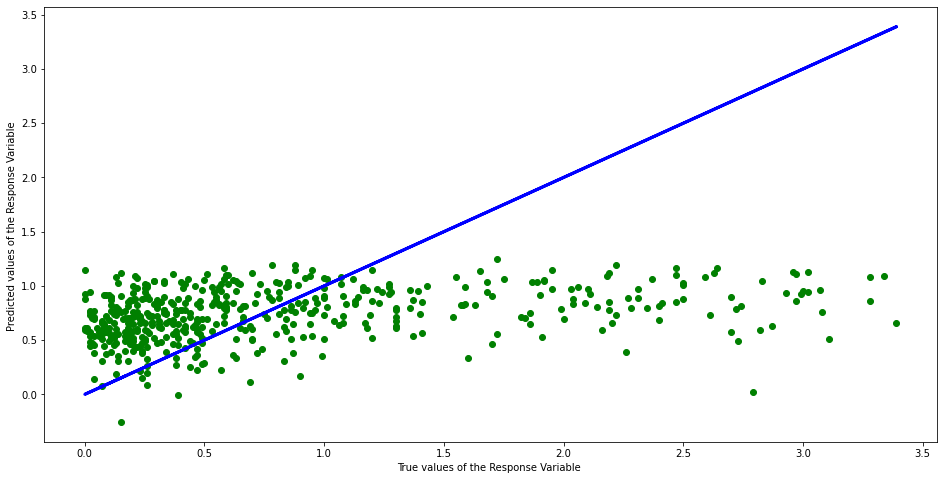

In [34]:
f, axes = plt.subplots(figsize=(16, 8))
axes.scatter(y_test, pred, color = "green")
axes.plot(y_test, y_test, 'b-', linewidth = 3)
axes.set_xlabel("True values of the Response Variable ")
axes.set_ylabel("Predicted values of the Response Variable ")
plt.show()

# 6. Optimizing the Model via Support Vector Regression

We will be using support vector regression (SVR) to more clearly define the best fit line in a hyperplane.

While linear regression models minimise the error between actual and predicted values through best fit line, SVR is able to fit the best line within its decision boundary i.e. margin lines known as support vectors. It is within this space between the 2 hyperplanes that "trial-and-error", done using gridsearch, is able to determine this line of best fit with the maximum number of points and best distinguishes the 2 hyperplanes.

In [35]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
svrpred = regressor.predict(X_test)

#Evaluation
print("MSE: ",mean_squared_error(y_test, svrpred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, svrpred)))

MSE:  0.6620155344686186
RMSE:  0.8136433705676085


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


As we can see here, the root mean squared error of the support vector regression model (0.8136433705676085) is slightly higher than that of the simple linear regression (0.7624112759463194). This is understandable since there are multiple parameters within the SVR model that are not specified and without the ideal parameters that are best suited for our particular problem and dataset, it is possible to do worse prior to hypertuning the parameters.

### Using GridSearch to tune model

Finding the right parameters for a model is quite tricky. However, we can use this "guess-and-check" method by trying different combinations to see whcih combination is the best for the model. This is why we use gridsearch - creating a 'grid' of parameters and trying all the combinations. <br>

GridSearchCV takes in a dictionary of parameters to be tested as the settings to the training model.<br>

In order to improve our model accuracy, there are several parameters to be tuned and the 3 we are using are: Kernels, C (Regularisation) and Gamma. <br>

#### Kernels
This is to try diffferent functions i.e. Gaussian/ Sigmoid/ Polynomial etc. in order to transform our input space into a higher dimensional space so as to have a better separation/more clearly defined separated margin space i.e. 2 hyperplanes to fit our best fit line.

#### C (Regularisation)
C is the penalty parameter, it symbolises the error term, which informs SVR optimisation the threshold of error in order to control trade-off between decision boundary and misclassification term. High C value will classifiy all data points accurately, but there will still be possibility to overfitting model.

#### Gamma
Gamma determines the extent to which the distance between points and the possible line of separation are considered in its calculation. Higher gamma means only nearer points are considered while lower gamma implies inverse.

In [36]:
from sklearn.model_selection import GridSearchCV

hyper_grid = {'C': [0.1,1,10,100,1000], 'gamma':[1,0,1,0,0.1,0,0.01,0,0.001], 'kernel':['rbf']}

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
grid = GridSearchCV(estimator = regressor,
                    param_grid = hyper_grid,
                    refit = True,
                    verbose = 3)
grid.fit(X_train, y_train)

C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.095 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.081 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.119 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.095 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.081 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.119 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.032 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.030 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.012 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.067 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.085 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.075 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.023 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.084 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.093 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.040 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.058 total time=   0.0s
[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.023 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.084 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.093 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.040 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.058 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.064 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.188 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.182 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.174 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.157 total time=   0.0s
[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.085 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.185 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.148 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.039 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.096 total time=   0.0s
[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.007 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.034 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.004 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.021 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.047 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.009 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.102 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.021 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.049 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.009 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.102 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.049 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.136 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.048 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.140 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.048 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.094 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.026 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.102 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.144 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.035 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.144 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.063 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.097 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.048 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.006 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.032 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.004 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.054 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.093 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.015 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.031 total time=   0.0s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.004 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.054 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.093 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.015 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.031 total time=   0.0s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.343 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.040 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.067 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.020 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.018 total time=   0.0s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.263 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.583 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.017 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.453 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.056 total time=   0.2s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.045 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.111 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.086 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.038 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.186 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.040 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.100 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.017 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.042 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.186 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.040 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.100 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.017 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.042 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-1.133 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.756 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.800 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.211 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.455 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-1.458 total time=   1.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-2.059 total time=   1.3s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-1.270 total time=   1.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-1.584 total time=   1.1s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.675 total time=   1.6s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.023 total time=   0.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.104 total time=   0.7s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.080 total time=   0.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.039 total time=   0.8s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.039 total time=   0.7s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 1, 0, 0.1, 0, 0.01, 0, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

Fit here not only does the same .fit() loop with cross validation to find the best parameter combination, but also finally runs the .fit() function again on all data passed without cross validation to build a single new model with the best parameter setting.

In [37]:
# Check best parameters found using GridSearchCV
grid.best_params_
grid.best_estimator_

SVR(C=1, gamma=0.1)

In [38]:
# Re-run predictions and evaluations on this grid model
gridpred = grid.predict(X_test)
print("MSE: ",mean_squared_error(y_test, gridpred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, gridpred)))

MSE:  0.5121241871022278
RMSE:  0.7156285259142678


### Evaluation and Intuition behind the models
As we can see here, the error metrics have been considerably improved prior to hyperparameter tuning. When this tuned SVR model is put in comparison with the simple linear regression model, we can also see quite a distinct improvement in model performance as the __MSE__ and __RMSE__ have both improved from __0.581__ and __0.762__ to __0.512__ and __0.716__ respectively.

Intuitively, as with all regressors it tries to fit a line to data by minimising a cost function. However, the interesting part about SVR is that a non-linear kernel can be utilised. In this case a non-linear regression may be applied, i.e. fitting a curve rather than a line. This process is based on the "kernel trick". At the same time the basic algorithm remains the same: the only real change in the process of going non-linear is the kernel function, which changes from a simple inner product to some non linear function.

So SVR allows non linear fitting problems as well while LinearRegression() is only for simple linear regression with straight line (may contain any number of features in both cases).

# 7. Insights Based on Model 
Now that we have our model, we can use it to derive our insight. What we intend to do is to help new and aspiring game creators in their starting journey of game development. We can hence utilise our tuned SVR model in recommending a good combination of __Genre, Platform, Publisher, Developer and Release Month__ for them. 

The idea is to allow them to choose which predictor they have in mind, insert into our function and thereafter, our function will pick out the best combination of other predictors not specified by the user - best in terms of predicted total_sales.



Since it will not be practical if the desired game score is already input at the start state, we have decided to create a separate model (still based on the tuned SVR model) just that it will be trained without the __"Score"__ predictor. 

In [39]:
X = pd.DataFrame(vgsales[['Genre', 'Platform', 'Publisher', 'Developer', 'Release_Month']])
y = pd.DataFrame(vgsales['Total_Sales (in mil)'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

insight = SVR(kernel='rbf')
insight.fit(X_train, y_train)

grid_2 = GridSearchCV(estimator = insight,
                    param_grid = hyper_grid,
                    refit = True,
                    verbose = 3)
grid_2.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.079 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.040 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.112 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.079 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.040 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.112 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.030 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.052 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.030 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.053 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.020 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.063 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.059 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.113 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.052 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.109 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.107 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.165 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.038 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.096 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.108 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.074 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.074 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.038 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.096 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.108 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.074 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.074 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.066 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.160 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.163 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.107 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.103 total time=   0.0s
[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.019 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.144 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.112 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.048 total time=   0.0s
[CV 1/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .........C=1, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.087 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.108 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.121 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.060 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.060 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.104 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.083 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.059 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.096 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.056 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ........C=10, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.044 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.019 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.050 total time=   0.0s
[CV 1/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.060 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.060 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.321 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.119 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.014 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.149 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.111 total time=   0.0s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.324 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.844 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.068 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.398 total time=   0.2s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.138 total time=   0.2s
[CV 1/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END .......C=100, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.034 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.063 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.060 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.012 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.063 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.060 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.374 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.295 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.153 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.159 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.422 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-1.476 total time=   1.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-2.686 total time=   1.3s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.923 total time=   1.4s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-1.489 total time=   1.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-1.190 total time=   1.6s
[CV 1/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.122 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0, kernel=rbf;, score=-0.156 total time=   0.0s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV 1/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.111 total time=   0.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.024 total time=   0.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.036 total time=   0.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.122 total time=   0.6s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.142 total time=   0.8s


C:\Users\Chee Wen Zhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 1, 0, 0.1, 0, 0.01, 0, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

Right now, a combination of all the different predictor values is required in order for us to check against and use the relevant ones to predict their __Total_Sales__ value.

In [40]:
from itertools import product

# The dictionary to pair numeric values of the categorical features
plats = {'X360': 1,'PS3': 2,'PS2': 3,'PSP': 4,'Wii': 5,'PC': 6,'GC': 7,'DS': 8,'GBA': 9,'PS': 10,'3DS': 11,'XB': 12,
         'WiiU': 13,'N64': 14,'PS4': 15,'DC': 16,'XOne': 17,'SNES': 18,'SAT': 19,'NS': 20,'GB': 21,'GBC': 22,'VC': 23,
         'NES': 24,'GEN': 25,'PSN': 26,'PSV': 27}
gens = {'Action': 1,'Sports': 2,'Role-Playing': 3,'Shooter': 4,'Platform': 5,'Racing': 6,'Misc': 7,
       'Fighting': 8,'Strategy': 9,'Simulation': 10,'Adventure': 11,'Puzzle': 12}
pubs = {'Nintendo': 1,'Ubisoft': 2,'Activision': 3,'Electronic Arts': 4,'EA Sports': 5,'Sega': 6,'Konami': 7,'Capcom': 8,
        'THQ': 9,'Square Enix': 10,'Sony Computer Entertainment': 11,'LucasArts': 12,'2K Sports': 13,'Eidos Interactive': 14,
        'Namco': 15,'Namco Bandai': 16,'Atlus': 17,'Midway Games': 18,'Codemasters': 19,'Disney Interactive Studios': 20,
        'NIS America': 21,'Warner Bros. Interactive': 22,'Bethesda Softworks': 23,'MTV Games': 24,'Microsoft Game Studios': 25,
        'Blizzard Entertainment': 26,'2K Games': 27,'Rockstar Games': 28,'Atari': 29,'Tecmo Koei': 30,'Tecmo': 31,'KOEI': 32,
        'Square EA': 33,'Deep Silver': 34,'Square': 35,'Sierra Entertainment': 36,'Aksys Games': 37,'Konami Digital Entertainment': 38,
        'Buena Vista': 39,'Majesco': 40,'EA Sports BIG': 41,'VU Games': 42,'Crave Entertainment': 43,'Bandai': 44,
        '505 Games': 45,'Vivendi Games': 46,'Agetec': 47,'Microsoft': 48,'Infogrames': 49,'Acclaim Entertainment': 50,
        'Namco Bandai Games': 51,'D3 Publisher': 52,'Microsoft Studios': 53,'Xseed Games': 54,'Natsume': 55,
        'Take-Two Interactive': 56, 'Interplay': 57,'Unknown': 58,'Warner Bros. Interactive Entertainment': 59,
        'Ignition Entertainment': 60,'Sony Interactive Entertainment': 61,'Paradox Interactive': 62,
        'SouthPeak Interactive': 63,'3DO': 64}
devs = {'Capcom (Developer)': 1,'EA Canada': 2,'EA Tiburon': 3,'Ubisoft Montreal': 4,'Konami (Developer)': 5,'Nintendo EAD': 6,
        "Traveller's Tales": 7,'Visual Concepts': 8,'Ubisoft (Developer)': 9,'Square Enix (Developer)': 10,'Sonic Team': 11,
        'Vicarious Visions': 12,'Namco (Developer)': 13,'Neversoft Entertainment': 14,'Omega Force': 15,'Rare Ltd.': 16,
        'SquareSoft': 17,'Sega (Developer)': 18,'EA Redwood Shores': 19 ,'Treyarch': 20,'Codemasters (Developer)': 21,'Intelligent Systems': 22,'Atlus Co.': 23,
        'From Software': 24,'EA Black Box': 25,'Nintendo (Developer)': 26,'Raven Software': 27,'Hudson Soft': 28,
        'Harmonix Music Systems': 29,'Infinity Ward': 30,'Krome Studios': 31,'Heavy Iron Studios': 32,'Team Ninja': 33,
        'EA Los Angeles': 34,'Crystal Dynamics': 35,'Artificial Mind and Movement': 36,'Namco Bandai Games (Developer)': 37,
        'Ubisoft Paris': 38,'Blizzard Entertainment (Developer)': 39,'Volition Inc.': 40,'Konami Computer Entertainment Tokyo': 41,
        'HAL Laboratory': 42,'Maxis': 43,'Digital Eclipse': 44,'Eurocom Entertainment Software': 45,'Kojima Productions': 46,
        'Nippon Ichi Software': 47,'CyberConnect2': 48,'Level 5': 49,'Amaze Entertainment': 50,'IO Interactive': 51,
        'Midway Games (Developer)': 52,'Sumo Digital': 53,'Sega-AM2': 54,'Avalanche Software': 55,'Rockstar North': 56,
        'Pandemic Studios': 57,'Insomniac Games': 58,'Climax Group': 59,'Rebellion Developments': 60,
        'Camelot Software Planning': 61,'Criterion Games': 62,'Griptonite Games': 63,'Radical Entertainment': 64,
        'Point of View': 65,'Ubisoft Montpellier': 66,'Techland': 67,'Bizarre Creations': 68,'Gearbox Software': 69,
        'BioWare Corp.': 70,'n-Space': 71,'Arc System Works': 72,'Blitz Games': 73,'Rainbow Studios': 74,
        'High Voltage Software': 75,'tri-Ace': 76,'The Creative Assembly': 77,'Obsidian Entertainment': 78,
        'Konami Computer Entertainment Japan': 79,'Gust': 80,'EA Montreal': 81,'THQ (Developer)': 82,'The Sims Studio': 83,
        'WayForward Technologies': 84,'Dimps Corporation': 85,'Next Level Games': 86,'Avalanche Studios': 87,
        'SCE Japan Studio': 88,'TOSE Software': 89,'LucasArts (Developer)': 90,'Beenox': 91,'Unknown (Developer)': 92,'Naughty Dog': 93,
        'Bandai Namco Games': 94,'Bethesda Game Studios': 95,'Argonaut Games': 96,'Game Arts': 97,'Ubisoft Shanghai': 98,
        'Epic Games': 99,'SCE San Diego Studio': 100,'Monolith Soft': 101,'Firaxis Games': 102,'Taito Corporation': 103,
        'Sports Interactive': 104,'Nd Cube Co., Ltd.': 105,'Atlus (Developer)': 106,'Valve Software': 107,'EA Vancouver': 108,
        'Bethesda Softworks (Developer)': 109,'Game Freak': 110,'Piranha Bytes': 111,'Nintendo EPD': 112}
mths = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8,
                'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12}

# To get the combination of every single predictor first
combi_list = map(dict, product(gens.items(), plats.items(), pubs.items(), devs.items(), mths.items()))
combi_list = list(combi_list)

## Blackbox Function to generate combination with Highest Total Sales

The following function is an algorithm used to receive user input predictor values that they have chosen and when passed through, will generate the optimal combination of predictors that is likely able to achieve highest total_sales. This will utilise our previously generated SVR model (without __Score__) to predict each combination.

In [41]:
def generator(Genre = None, Platform = None, Publisher = None, Developer = None):
    
    # Adding the User input predictor choices to be used as fixed predictor values
    features = {'Genre' : -1, 'Platform' : -1, 'Publisher' : -1, 'Developer' : -1, 'Release_Month' : -1}
    if (isinstance(Genre, str)): 
        features['Genre'] = gens[Genre]
        
    if (isinstance(Platform, str)): 
        features['Platform'] = plats[Platform]
        
    if (isinstance(Publisher, str)): 
        features['Publisher'] = pubs[Publisher]
        
    if (isinstance(Developer, str)): 
        features['Developer'] = devs[Developer]
        
    column_names = ['Genre', 'Platform', 'Publisher', 'Developer', 'Release_Month']
    
    # Now iterate through the list of combinations of the predictors to find the maximum predicted total_sales value
    max = 0
    for combi in combi_list:
        
        # 'fine' is a variable used to check if that partiuclar iteration's combination of predictors has the specified 
        # predictor value by the user
        fine = 1
        
        # Now iterate through that particular iteration's dictionary
        for key,value in combi.items():
            
            # Check for whether the specified predictor values are used. If not used, can just skip this iteration's predictions
            if key in gens and features['Genre'] != -1 and gens[key] != features['Genre']:
                fine = 0
                break
            elif key in plats and features['Platform'] != -1 and plats[key] != features['Platform']:
                fine = 0
                break
            elif key in pubs and features['Publisher'] != -1 and pubs[key] != features['Publisher']:
                fine = 0
                break
            elif key in devs and features['Developer'] != -1 and devs[key] != features['Developer']:
                fine = 0
                break

        # If the iteration used the specified predictor values, then predict the total sales and replace max value accordingly
        if fine:  
            test = pd.DataFrame(combi, index = [0])
            entry = grid_2.predict(test)[0]
            if max < entry:
                max = entry
                wanted = test
    
    # return the combination with the highest total sales
    idealcombi =  wanted.columns.tolist()
    print("Your best combination is :-")
    print("Genre: ", idealcombi[0])
    print("Platform: ", idealcombi[1])
    print("Publisher: ", idealcombi[2])
    print("Developer: ", idealcombi[3])
    print("Release Month: ", idealcombi[4])
    print("Estimated Total Sales: ", round(max, 2), " million copies!")

In [42]:
generator(Genre = 'Action', Platform = 'X360')

Your best combination is :-
Genre:  Action
Platform:  X360
Publisher:  THQ
Developer:  Heavy Iron Studios
Release Month:  October
Estimated Total Sales:  2.0  million copies!


## 8. Conclusion

### Data-Driven Insights
1. Games enjoy high sale volume during __summer__ and __Christmas__ season.
2. Games suffer low sale volume during __recession__.
3. Nintendo is a reliable publisher and developer for potential game developers.

### Blackbox Model
- Users fill in at least 1 attribute of their game.
- Generator decide the best option for the rest of the attributes.
- Useful for users who already __have a general idea__ of their game, looking to __get a more complete image and guidance__.

### Future Improvements
1. Scrape __Summary__, __Reviews__ from VGChartz individual game sites and perform __Natural Language Processing__ to improve the regression model.
2. Use other gaming websites such as Steam to fill in blanks in the dataset. This is to retain more game entries to generate a better model.

---

## Thank you!